# Time Series Analysis for Q4
Tutorial: https://colab.research.google.com/drive/1h7okvRLHCbIGocdHy_jfLdgPN2vOi9CV?usp=sharing

In [551]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [552]:
df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)
df_wind.head()

/tmp/ipykernel_5467/3030181279.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)


,0,1,2,3,4
0,"# Renewables.ninja Wind (current total fleet, ...",NaN,NaN,NaN,NaN
1,# Units: time in UTC; other columns are capaci...,NaN,NaN,NaN,NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN,NaN,NaN,NaN
3,time,NATIONAL,IE04,IE05,IE06
4,1980-01-01 00:00:00+00:00,0.145697,0.056425,0.224918,0.042835


In [553]:
for i in range(3):
    print(df_wind.iloc[i, 0])
    print("\n")

# Renewables.ninja Wind (current total fleet, country zones, hourly, 1980 - 2024)  -  Ireland  -  ninja_wind_countryzones_hourly_IE_current-total_merra2.csv  -  Version 1.4  -  License: https://creativecommons.org/licenses/by-nc/4.0/  -  Reference: https://doi.org/10.1016/j.energy.2016.08.068


# Units: time in UTC; other columns are capacity factors [0-1].  Column names signify country ISO2 code or NUTS2 code.  Simulation represents 4965 MW of capacity.  Bias corrected using national generation data.


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]', 'IE04': 'bias-corrected capacity factor [0-1]', 'IE05': 'bias-corrected capacity factor [0-1]', 'IE06': 'bias-corrected capacity factor [0-1]'}, 'country': 'Ireland', 'filename': 'ninja_wind_countryzones_hourly_IE_current-total_merra2.csv', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.068'}




In [554]:
w_capacity = 4000 # used to go from normalized values to absolute values

df_wind = df_wind.iloc[4:, :]
df_wind.head()
col = ['time', 'National', 'IE04', 'IE05', 'IE06']
df_wind.columns = col

In [555]:

df_wind.tail()

,time,National,IE04,IE05,IE06
394487,2024-12-31 19:00:00+00:00,0.566249,0.684685,0.468164,0.649192
394488,2024-12-31 20:00:00+00:00,0.506534,0.665317,0.374993,0.618031
394489,2024-12-31 21:00:00+00:00,0.476798,0.64879,0.33732,0.574653
394490,2024-12-31 22:00:00+00:00,0.460486,0.642585,0.315573,0.542981
394491,2024-12-31 23:00:00+00:00,0.424961,0.620224,0.273166,0.486031


In [556]:
df_wind24 = df_wind.iloc[-(366*24):, 0:2]
df_wind24.head()

,time,National
385708,2024-01-01 00:00:00+00:00,0.556594
385709,2024-01-01 01:00:00+00:00,0.507085
385710,2024-01-01 02:00:00+00:00,0.450664
385711,2024-01-01 03:00:00+00:00,0.396818
385712,2024-01-01 04:00:00+00:00,0.358569


In [557]:
wind_recordings = np.array(df_wind24['National'].astype('float').tolist()) * w_capacity

print(max(wind_recordings))
print(min(wind_recordings))
print(np.mean(wind_recordings))
print(len(wind_recordings))


3924.044
8.092
1198.830454007286
8784


In [558]:
a = 3*24 #moving average wondow size
N = len(wind_recordings)
mvavg_wind24 = np.zeros(len(wind_recordings))
for i in range(a, N):
    mvavg_wind24[i] = sum(wind_recordings[i-a: i]) / a

print(max(mvavg_wind24[a:]))
print(min(mvavg_wind24[a:]))
print(np.mean(mvavg_wind24[a:]))

3282.7031666666658
129.67355555555557
1191.3151969952046


Maximum recorded wind power 3924.044 0.981011
Minimum recorded wind power: 8.092 0.002023
Mean wind power: 1198.830454007286 0.2997076135018215

Maximum moving average wind power: 3282.7031666666658 0.8206757916666665
Minimum moving average wind power: 129.67355555555557 0.03241838888888889
Mean moving average wind power: 1191.3151969952046 0.2978287992488011


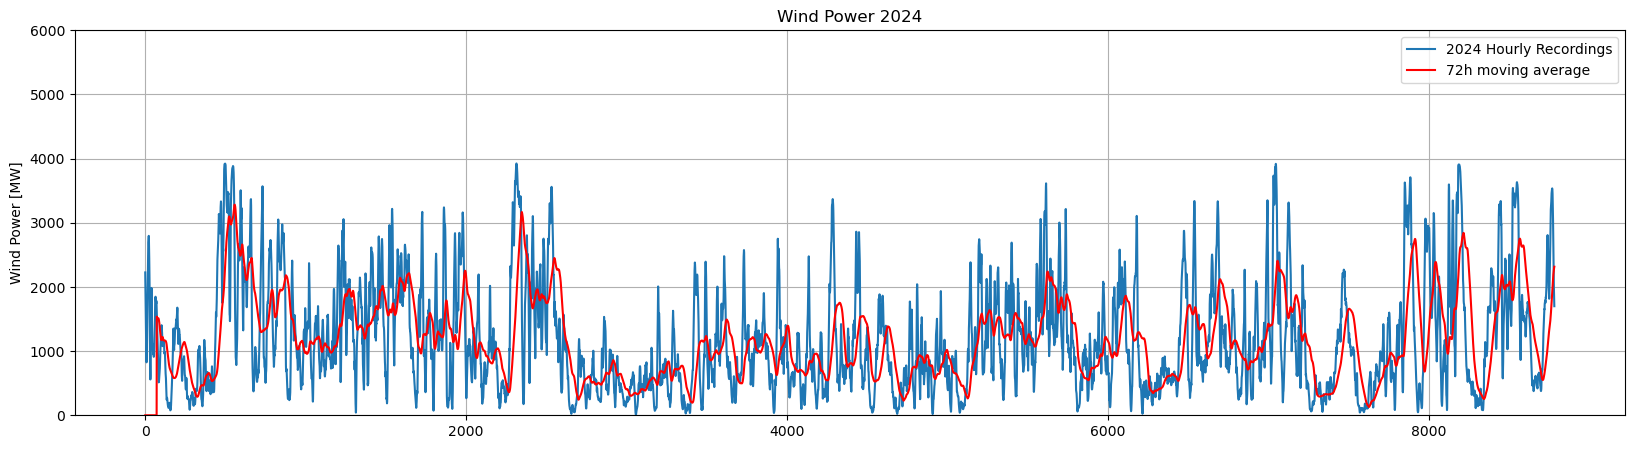

In [559]:
plt.figure(figsize=(20, 5))
plt.title('Wind Power 2024')
plt.plot(wind_recordings)
plt.plot(mvavg_wind24, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.grid(True)
plt.ylabel('Wind Power [MW]')
plt.ylim([0, 6000])
plt.savefig("wind-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded wind power", max(wind_recordings), max(wind_recordings) / w_capacity)
print("Minimum recorded wind power:", min(wind_recordings), min(wind_recordings) / w_capacity )
print("Mean wind power:", np.mean(wind_recordings), np.mean(wind_recordings) / w_capacity )

print("\nMaximum moving average wind power:", max(mvavg_wind24[a:]), max(mvavg_wind24[a:]) / w_capacity)
print("Minimum moving average wind power:", min(mvavg_wind24[a:]), min(mvavg_wind24[a:]) / w_capacity )
print("Mean moving average wind power:", np.mean(mvavg_wind24[a:]),np.mean(mvavg_wind24[a:]) / w_capacity)


# Solar

In [560]:
df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)
df_pv.head()

/tmp/ipykernel_5467/3181467354.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)


,0,1
0,"# Renewables.ninja pv (country zones, hourly, ...",NaN
1,"# Units: time in UTC, other columns are bias-c...",NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN
3,time,NATIONAL
4,1980-01-01 00:00:00+00:00,0.000000


In [561]:

for i in range(3):
    print(df_pv.iloc[i, 0])
    print("\n")

# Renewables.ninja pv (country zones, hourly, 1980 - 2024) - ES - ninja-pv-countryzones-ES-hourly-merra2.csv.gz - Version: 1.4 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2016.08.060


# Units: time in UTC, other columns are bias-corrected capacity factors [0-1].


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]'}, 'country': 'ES', 'filename': 'ninja-pv-countryzones-ES-hourly-merra2.csv.gz', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.060'}




In [562]:
pv_capacity = 2000
pv_header = ['time', 'national']
df_pv.columns = pv_header
df_pv = df_pv.iloc[-366*24:, :]
df_pv.head()

,time,national
385708,2024-01-01 00:00:00+00:00,0.0
385709,2024-01-01 01:00:00+00:00,0.0
385710,2024-01-01 02:00:00+00:00,0.0
385711,2024-01-01 03:00:00+00:00,0.0
385712,2024-01-01 04:00:00+00:00,0.0


Maximum recorded pv power 1486.0 0.743
Mean Hourly pv power 333.1700819672131 0.16658504098360655
Minimum recorded pv power: 0.0 0.0
Maximum 72h moving average pv power 492.72222222222223 0.24636111111111111
Mean 72h moving average pv power 334.18185644322006 0.16709092822161004
Minimum 72h moving average pv power 105.13888888888889 0.05256944444444444


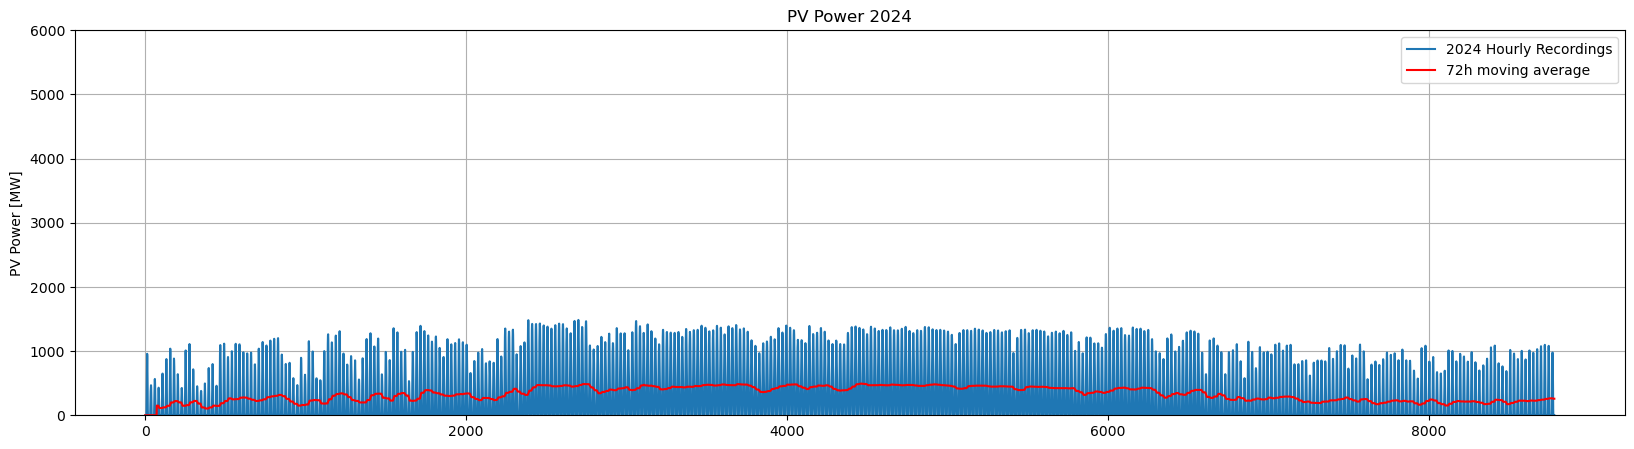

In [563]:
pv_power = np.array(df_pv['national'].astype('float').tolist()) * pv_capacity
mvavg_pv = np.zeros(len(pv_power))
for i in range(a, len(pv_power)):
    mvavg_pv[i] = sum(pv_power[i-a: i]) / a

plt.figure(figsize=(20, 5))
plt.plot(pv_power)
plt.plot(mvavg_pv, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.title('PV Power 2024')
plt.ylabel('PV Power [MW]')
plt.ylim([0, 6000])
plt.grid(True)
plt.savefig("pv-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded pv power", max(pv_power), max(pv_power) / pv_capacity)
print("Mean Hourly pv power", np.mean(pv_power), np.mean(pv_power) / pv_capacity)
print("Minimum recorded pv power:", min(pv_power), min(pv_power) / pv_capacity)

print("Maximum 72h moving average pv power", max(mvavg_pv[a:]), max(mvavg_pv[a:]) / pv_capacity)
print("Mean 72h moving average pv power", np.mean(mvavg_pv[a:]), np.mean(mvavg_pv[a:]) / pv_capacity)
print("Minimum 72h moving average pv power", min(mvavg_pv[a:]), min(mvavg_pv[a:]) / pv_capacity)

# Demand

In [564]:
df_demand = pd.read_csv("GUI_TOTAL_LOAD_DAYAHEAD_202312312300-202412312300.csv")
df_demand

,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW)
0,01/01/2024 00:00 - 01/01/2024 00:30,Ireland (IE),3500.51,3678.0
1,01/01/2024 00:30 - 01/01/2024 01:00,Ireland (IE),3533.43,3613.0
2,01/01/2024 01:00 - 01/01/2024 01:30,Ireland (IE),3459.59,3828.0
3,01/01/2024 01:30 - 01/01/2024 02:00,Ireland (IE),3416.14,3828.0
4,01/01/2024 02:00 - 01/01/2024 02:30,Ireland (IE),3333.59,3769.0
...,...,...,...,...
17563,31/12/2024 21:30 - 31/12/2024 22:00,Ireland (IE),3984.61,4671.0
17564,31/12/2024 22:00 - 31/12/2024 22:30,Ireland (IE),3874.34,4530.0
17565,31/12/2024 22:30 - 31/12/2024 23:00,Ireland (IE),3789.38,4388.0
17566,31/12/2024 23:00 - 31/12/2024 23:30,Ireland (IE),3706.46,4233.0


In [565]:
# Data is half-hourly, get rud of every other entry to get hourly data
a = np.array(df_demand.index.tolist())
b = (a + 1) % 2
df_demand = df_demand.iloc[np.where(b == 1)[0]]
df_demand.head()

,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW)
0,01/01/2024 00:00 - 01/01/2024 00:30,Ireland (IE),3500.51,3678.0
2,01/01/2024 01:00 - 01/01/2024 01:30,Ireland (IE),3459.59,3828.0
4,01/01/2024 02:00 - 01/01/2024 02:30,Ireland (IE),3333.59,3769.0
6,01/01/2024 03:00 - 01/01/2024 03:30,Ireland (IE),3181.32,3661.0
8,01/01/2024 04:00 - 01/01/2024 04:30,Ireland (IE),3079.68,3579.0


In [566]:
print("Max demand:", max(df_demand['Actual Total Load (MW)'].astype('float')))

Max demand: 5670.67


In [567]:
demand = np.array(df_demand['Actual Total Load (MW)'].astype('float').tolist()) * (6000 / 5670.67)

In [568]:
mvavg_demand = np.zeros(N)
a = 24

# There are some nan values in this dataset, I had to account for that when calculating the average
for i in range(a, N):
    x = sum(np.isnan(demand[i-a:i]))
    mvavg_demand[i] = np.nansum(demand[i-a:i]) / (a - x)

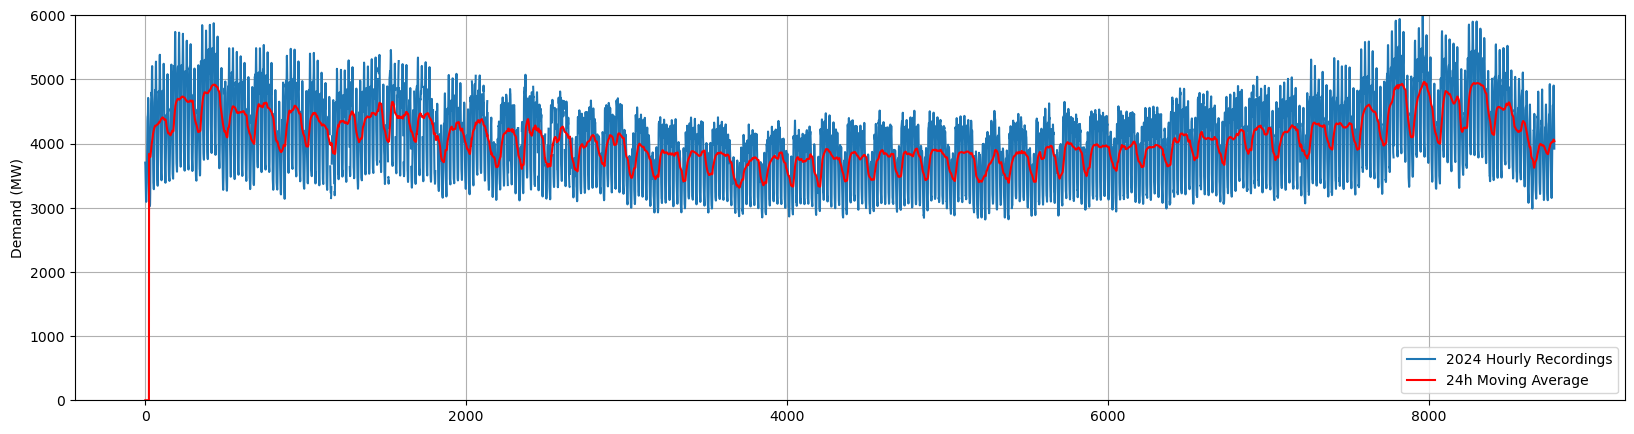

In [569]:
plt.figure(figsize=(20, 5))
plt.plot(demand)
plt.plot(mvavg_demand, color='red')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.legend(['2024 Hourly Recordings', '24h Moving Average'])
plt.ylim([0, 6000])
plt.savefig("demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [570]:
print("Maximum demand", max(demand), max(demand) / 6000)
print("Mean demand", np.nansum(demand) / len(demand), np.nansum(demand) / len(demand) / 6000)
print("Minimum demand", min(demand), min(demand) / 6000)

print("\nMaximum 24h Moving average demand", max(mvavg_demand[a:]), max(mvavg_demand[a:]) / 6000)
print("Mean 24h Moving average demand", np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]), np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]) / 6000)
print("Minimum 24h Moving Average Demand", min(mvavg_demand[a:]), min(mvavg_demand[a:]) / 6000)

Maximum demand 6000.0 1.0
Mean demand 4020.1151479666805 0.6700191913277801
Minimum demand 2817.275560030825 0.46954592667180417

Maximum 24h Moving average demand 4961.161996730545 0.8268603327884242
Mean 24h Moving average demand 4052.064647142391 0.6753441078570652
Minimum 24h Moving Average Demand 3313.5643583562437 0.5522607263927073


# Residual demand
Demand after the production from wind and solar has been subtracted

In [571]:
# Find the indexes that has NaN values
idx = np.array(df_demand.iloc[np.where(np.isnan(demand) == True)].index.tolist())
idx = (idx / 2).astype('int')
idx

array([1046, 1151, 1152, 1157, 1161, 1167, 1168, 1179, 1261, 1274, 1384,
       1451, 1514, 1519, 1559, 1570, 1576, 1581, 1609, 1657, 1675, 1691,
       1719, 1727, 1766, 1767, 1795, 1796, 1798, 1809, 1911, 1912, 1913,
       2029, 2035, 2061, 2099, 2107, 2133, 2261, 2323, 2324, 2346, 2393,
       2417, 2428, 2435, 2448, 2467, 2494, 2515, 2517, 2531, 2540, 2542,
       2563, 2564, 2565, 2609, 2614, 2646, 2653, 6322, 6927, 7200, 7201,
       7782])

In [572]:
demand[idx]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [573]:
# Find the indexes that does not have NaN values
idxOK = np.array(df_demand.iloc[np.where(np.isnan(demand) == False)].index.tolist())
idxOK = (idxOK / 2).astype('int')
idxOK

array([   0,    1,    2, ..., 8781, 8782, 8783])

In [574]:
residual = demand[idxOK] - pv_power[idxOK] - wind_recordings[idxOK]

In [575]:
a = 72
N = len(residual)
mvavg_residual = np.zeros(N)
for i in range(a, N):
    mvavg_residual[i] = sum(residual[i-a:i]) / a

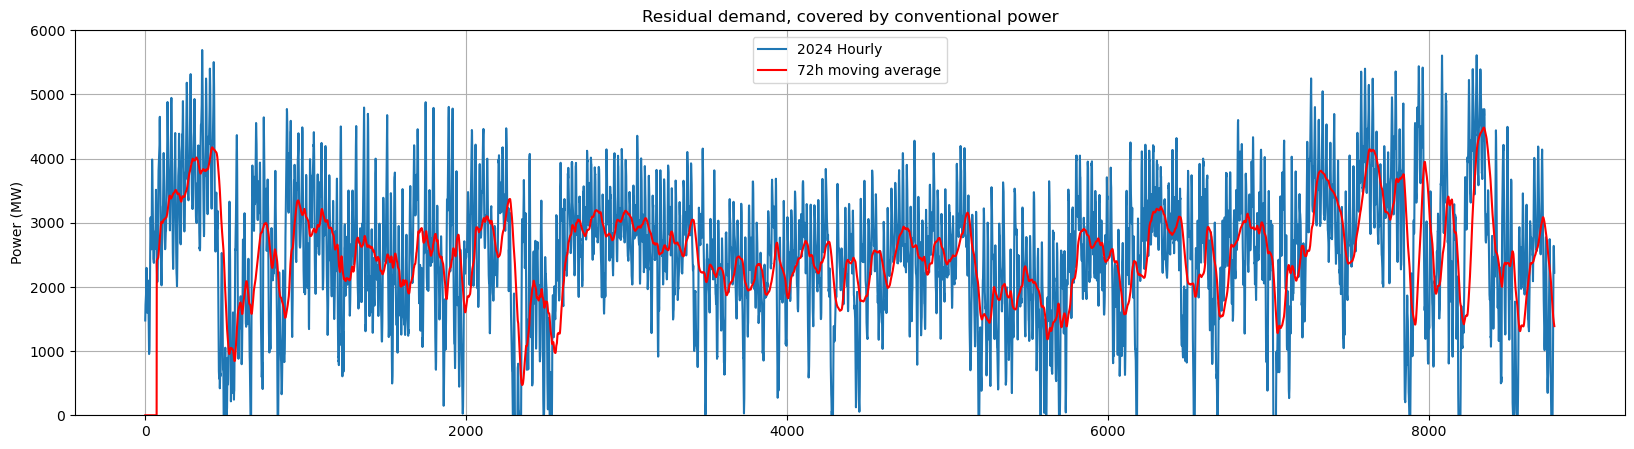

In [576]:
plt.figure(figsize=(20, 5))
plt.plot(idxOK, residual)
plt.plot(idxOK, mvavg_residual, color='red')
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.legend(['2024 Hourly', '72h moving average'])
plt.ylim([0, 6000])
plt.savefig("residual-demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [583]:
print("Maximum residual:", max(residual), max(residual) / 6000)
print("Mean residual:", np.mean(residual), np.mean(residual) / 6000)
print("Minimum residual:", min(residual), min(residual) / 6000)

Maximum residual: 5692.300006553018 0.9487166677588363
Mean residual: 2519.924616696034 0.41998743611600564
Minimum residual: -924.4017317036614 -0.15406695528394357


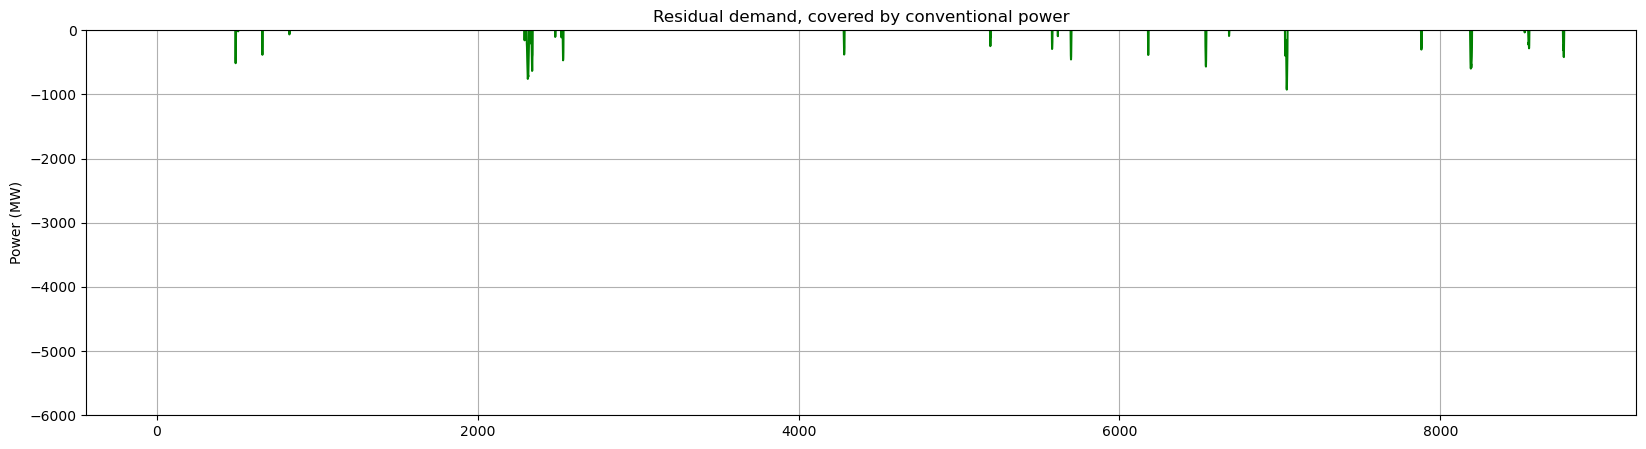

In [585]:
plt.figure(figsize=(20, 5))
plt.plot(idxOK, residual, color='green')
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.ylim([-6000, 0])
plt.savefig("residual-demand-negative.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')